In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### Load dataset - Boston Housing Dataset

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv(url, sep='\s+', header=None, names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Feature Descriptions – Boston Housing Dataset

| Feature Name | Description |
|--------------|-------------|
| **CRIM**     | Per capita crime rate by town |
| **ZN**       | Proportion of residential land zoned for lots over 25,000 sq. ft. |
| **INDUS**    | Proportion of non-retail business acres per town |
| **CHAS**     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX**      | Nitric oxides concentration (parts per 10 million) |
| **RM**       | Average number of rooms per dwelling |
| **AGE**      | Proportion of owner-occupied units built before 1940 |
| **DIS**      | Weighted distances to five Boston employment centers |
| **RAD**      | Index of accessibility to radial highways |
| **TAX**      | Full-value property-tax rate per $10,000 |
| **PTRATIO**  | Pupil–teacher ratio by town |
| **B**        | 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents (note: outdated and controversial feature) |
| **LSTAT**    | Percentage of lower status of the population |
| **MEDV**     | Median value of owner-occupied homes in $1000s (target variable) |


### EDA

#### Missing values

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


As we can see above, lack of any missing values, so do not have to do any additional missing values categorisation and any replacement for missings.

#### Cardinality

Length of the dataset: 506
CRIM      :   504
ZN        :    26
INDUS     :    76
CHAS      :     2
NOX       :    81
RM        :   446
AGE       :   356
DIS       :   412
RAD       :     9
TAX       :    66
PTRATIO   :    46
B         :   357
LSTAT     :   455
MEDV      :   229


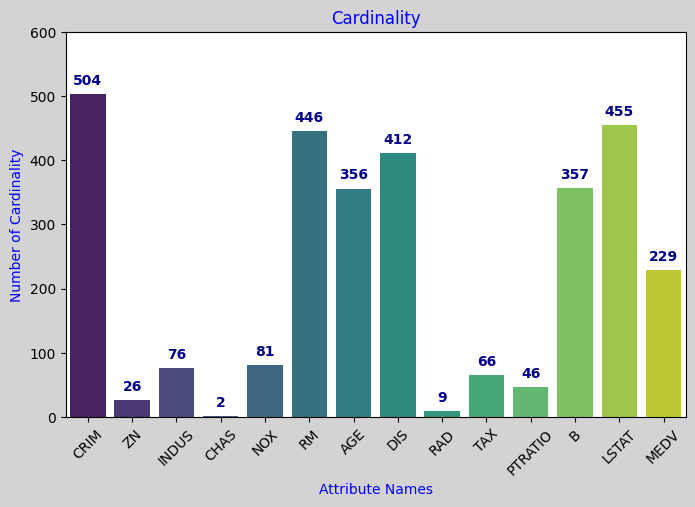

In [13]:
print(f'Length of the dataset: {len(df)}')

headers = df.columns.tolist()
cardinality = {}
for habit in headers: 
    tmp = len(df[habit].unique())
    cardinality[habit] = tmp
    print(f'{habit:<10}: {tmp:>5}')

plt.figure(figsize=(8, 5), facecolor='lightgrey')
ax = sns.barplot(
    x=headers,
    y=list(cardinality.values()),
    palette="viridis",
    hue=headers,
    legend=False
)
ax.set_facecolor('white')
for i, v in enumerate(cardinality.values()):
    ax.text(
        i,
        v + 10,
        str(v),
        ha='center',
        va='bottom',
        fontweight='bold',
        color='darkblue')

plt.ylim(0, 600)
plt.title("Cardinality", color='blue')
plt.xlabel("Attribute Names", color='blue')
plt.ylabel("Number of Cardinality", color='blue')
plt.xticks(rotation=45)
plt.show()


In this housting data it is hard to choose and do cardinality reduction on one of the attributes because of the fact that evry attrib here is meaningful for us and should stay as precise as it is.

#### Heatmap - to check the linear correlation

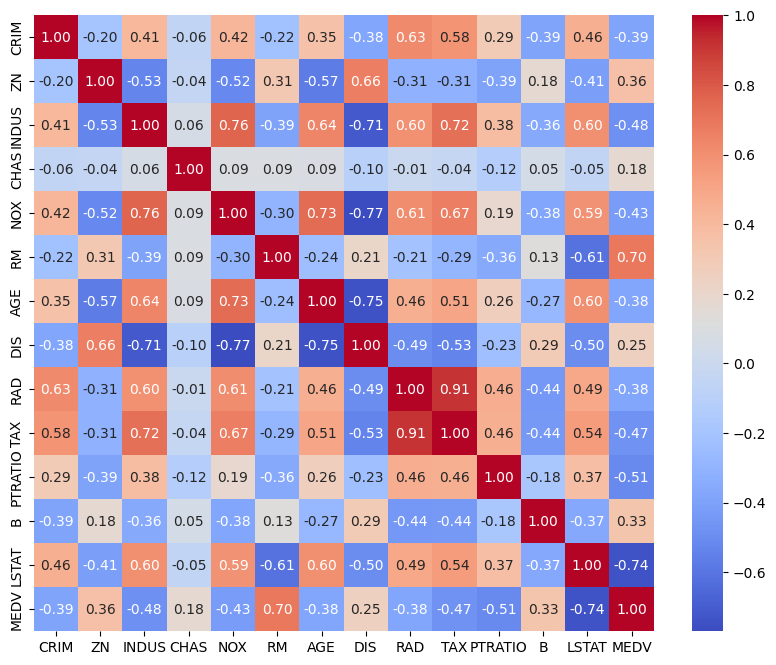

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

#### 📌 Strong Positive Correlations (r > 0.7)
- **TAX** and **RAD** → r = 0.91  
  → Highway accessibility is strongly associated with higher property tax rates.
- **INDUS** and **NOX** → r = 0.76  
  → More industrial areas are associated with higher air pollution.
- **AGE** and **NOX** → r = 0.73  
  → Older housing is found in areas with more pollution.
- **INDUS** and **TAX** → r = 0.72  
  → Industrial areas are also associated with higher property taxes.
- **RM** and **MEDV** → r = 0.70  
  → More rooms per dwelling correlates with higher house prices.

#### 📌 Strong Negative Correlations (r < -0.7)
- **LSTAT** and **MEDV** → r = -0.74  
  → Lower status population is strongly associated with lower house prices.
- **DIS** and **NOX** → r = -0.77  
  → Greater distance from employment centers is associated with less pollution.
- **DIS** and **INDUS** → r = -0.71  
  → Farther areas tend to have less industrialization.

These relationships are crucial for identifying multicollinearity and understanding which features may influence housing prices or overlap too much in predictive models.

### Devidation to test and train set

In [16]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=44)

### Examine various predictions models such as linear regression and XGBoost

In [20]:
lr = sk.linear_model.LinearRegression()
lr.fit(X_train, y_train)

import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=4, subsample=0.8)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [19]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb = xgb.XGBRegressor(random_state=42)

grid_search = sk.model_selection.GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


#### Linear regression VS XGboost

In [21]:
y_pred = lr.predict(X_test)
print('Linear Regression MSE:', sk.metrics.mean_squared_error(y_test, y_pred))
print('Linear Regression MAE:', sk.metrics.mean_absolute_error(y_test, y_pred))
print('Linear Regression R2:', sk.metrics.r2_score(y_test, y_pred))

y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost MSE:', sk.metrics.mean_squared_error(y_test, y_pred_xgb))
print('XGBoost MAE:', sk.metrics.mean_absolute_error(y_test, y_pred_xgb))
print('XGBoost R2:', sk.metrics.r2_score(y_test, y_pred_xgb))

Linear Regression MSE: 20.932750218683907
Linear Regression MAE: 3.507299158928329
Linear Regression R2: 0.7521800808693118
XGBoost MSE: 8.310882465613762
XGBoost MAE: 2.021650202134076
XGBoost R2: 0.9016086181215347


#### Model Performance Summary

The XGBoost model significantly outperforms Linear Regression across all evaluation metrics:

| Metric | Linear Regression | XGBoost | Interpretation |
|--------|-------------------|---------|----------------|
| **MSE** (Mean Squared Error) | 20.93 | **8.31** | XGBoost produces much smaller squared errors. |
| **MAE** (Mean Absolute Error) | 3.51 | **2.02** | On average, XGBoost is closer to the true value. |
| **R²** (R-squared) | 0.75 | **0.90** | XGBoost explains more variance in the data. |

**Conclusion:**  
XGBoost demonstrates better predictive accuracy and generalization than Linear Regression, making it the preferred model for this dataset.


### Check if linear regression assumptions are satisfied

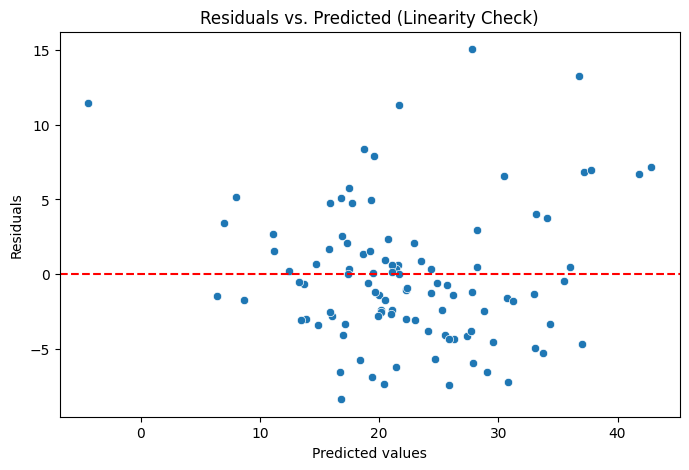

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted (Linearity Check)")
plt.show()


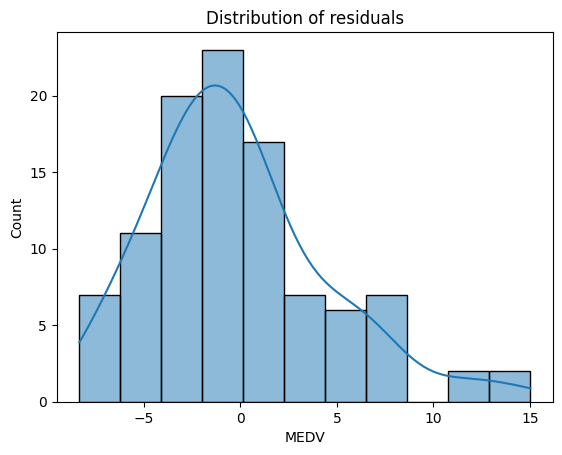

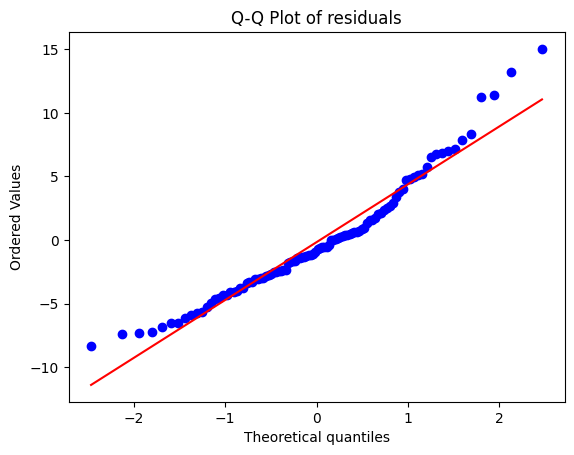

In [23]:
import scipy.stats as stats

sns.histplot(residuals, kde=True)
plt.title("Distribution of residuals")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of residuals")
plt.show()
